In the supervised regression framework used for this case study, weekly return of the
Microsoft stock is the predicted variable. We need to understand what affects Microsoft stock price and hence incorporate as much information into the model. 

For this case study, other than the historical data of Microsoft, the independent variables used are the following potentially correlated assets:
* Stocks: IBM (IBM) and Alphabet (GOOGL)
* Currency: USD/JPY and GBP/USD
* Indices: S&P 500, Dow Jones and VIX

In [1]:
# Load libraries
import numpy as np
import pandas as pd
import pandas_datareader.data as web
from matplotlib import pyplot
from pandas.plotting import scatter_matrix
import seaborn as sns
from sklearn.preprocessing import StandardScaler

from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.neural_network import MLPRegressor

#Libraries for Deep Learning Models
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import SGD
from keras.layers import LSTM
from keras.wrappers.scikit_learn import KerasRegressor

#Libraries for Statistical Models
import statsmodels.api as sm

#Libraries for Saving the Model
from pickle import dump
from pickle import load

# Time series Models
from statsmodels.tsa.arima_model import ARIMA
#from statsmodels.tsa.statespace.sarimax import SARIMAX

# Error Metrics
from sklearn.metrics import mean_squared_error

# Feature Selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_regression


#Plotting 
from pandas.plotting import scatter_matrix
from statsmodels.graphics.tsaplots import plot_acf


In [3]:
# Load in the data
stk_tickers = ['MSFT', 'IBM', 'GOOGL']
ccy_tickers = ['DEXJPUS', 'DEXUSUK']
idx_tickers = ['SP500', 'DJIA', 'VIXCLS']

stk_data = web.DataReader(stk_tickers, 'yahoo')
ccy_data = web.DataReader(ccy_tickers, 'fred')
idx_data = web.DataReader(idx_tickers, 'fred')

In [10]:
stk_data

Attributes   Adj Close                                Close              \
Symbols           MSFT         IBM        GOOGL        MSFT         IBM   
Date                                                                      
2016-06-29   46.560383  118.871620   695.190002   50.540001  148.460007   
2016-06-30   47.140781  121.529945   703.530029   51.169998  151.779999   
2016-07-01   47.131561  121.986351   710.250000   51.160000  152.350006   
2016-07-05   47.140781  121.449883   704.890015   51.169998  151.679993   
2016-07-06   47.334240  122.002342   708.969971   51.380001  152.369995   
...                ...         ...          ...         ...         ...   
2021-06-22  265.510010  146.360001  2446.610107  265.510010  146.360001   
2021-06-23  265.269989  144.610001  2442.540039  265.269989  144.610001   
2021-06-24  266.690002  145.440002  2450.000000  266.690002  145.440002   
2021-06-25  265.019989  146.839996  2450.169922  265.019989  146.839996   
2021-06-28  268.720001  145.289993  2450.719971  268.720001  145.289993   

Attributes                     High                                  Low  \
Symbols           GOOGL        MSFT         IBM        GOOGL        MSFT   
Date                                                                       
2016-06-29   695.190002   50.720001  148.479996   699.500000   49.799999   
2016-06-30   703.530029   51.299999  151.910004   703.770020   50.500000   
2016-07-01   710.250000   51.720001  152.970001   712.530029   51.070000   
2016-07-05   704.890015   51.279999  152.000000   708.119995   50.740002   
2016-07-06   708.969971   51.540001  152.410004   713.000000   50.389999   
...                 ...         ...         ...          ...         ...   
2021-06-22  2446.610107  265.790009  146.809998  2448.000000  262.399994   
2021-06-23  2442.540039  266.829987  146.500000  2461.909912  264.429993   
2021-06-24  2450.000000  267.850006  146.190002  2461.110107  265.470001   
2021-06-25  2450.169922  267.250000  146.929993  2452.659912  264.760010   
2021-06-28  2450.719971  268.899994  147.298004  2455.695068  265.959991   

Attributes                                 Open                           \
Symbols            IBM        GOOGL        MSFT         IBM        GOOGL   
Date                                                                       
2016-06-29  146.449997   692.679993   49.910000  146.500000   694.260010   
2016-06-30  148.669998   694.900024   50.720001  148.860001   697.650024   
2016-07-01  151.399994   703.729980   51.130001  151.779999   705.099976   
2016-07-05  150.759995   699.130005   50.830002  151.190002   705.010010   
2016-07-06  149.919998   699.000000   50.779999  151.850006   699.840027   
...                ...          ...         ...         ...          ...   
2021-06-22  145.350006  2421.280029  262.720001  146.520004  2435.000000   
2021-06-23  144.570007  2436.689941  265.989990  146.429993  2441.870117   
2021-06-24  144.690002  2446.000000  266.160004  145.800003  2454.000000   
2021-06-25  144.949997  2431.300049  266.230011  145.380005  2440.000000   
2021-06-28  144.912094  2428.159912  266.184998  147.009995  2453.570068   

Attributes      Volume                        
Symbols           MSFT        IBM      GOOGL  
Date                                          
2016-06-29  31304000.0  3367700.0  2156200.0  
2016-06-30  28527800.0  3967100.0  2112500.0  
2016-07-01  21400400.0  2658300.0  1549200.0  
2016-07-05  24806400.0  2465200.0  1422000.0  
2016-07-06  28167500.0  2569400.0  1445100.0  
...                ...        ...        ...  
2021-06-22  24694100.0  2437000.0  1119500.0  
2021-06-23  19518700.0  3202600.0   957400.0  
2021-06-24  21446900.0  3609700.0  1068100.0  
2021-06-25  25604200.0  3593500.0  1729700.0  
2021-06-28  19590024.0  3888869.0  1426271.0  

[1258 rows x 18 columns]

In [11]:
ccy_data

,DEXJPUS,DEXUSUK
DATE,,
2016-06-29,102.68,1.3510
2016-06-30,102.77,1.3242
2016-07-01,102.55,1.3281
2016-07-04,NaN,NaN
2016-07-05,101.58,1.3021
...,...,...
2021-06-21,110.22,1.3915
2021-06-22,110.75,1.3921
2021-06-23,110.86,1.3977


In [12]:
idx_data

,SP500,DJIA,VIXCLS
DATE,,,
2016-06-29,2070.77,17694.68,16.64
2016-06-30,2098.86,17929.99,15.63
2016-07-01,2102.95,17949.37,14.77
2016-07-04,NaN,NaN,NaN
2016-07-05,2088.55,17840.62,15.58
...,...,...,...
2021-06-22,4246.44,33945.58,16.66
2021-06-23,4241.84,33874.24,16.32
2021-06-24,4266.49,34196.82,15.97


In [4]:
# Series to predict, in this case weekly returns
return_period = 5

We now define our Y series and our X series

Y: MSFT **Future** Returns

X:

    a. GOOGL 5 Business Day Returns
    b. IBM 5 Business DayReturns    
    c. USD/JPY 5 Business DayReturns    
    d. GBP/USD 5 Business DayReturns    
    e. S&P 500 5 Business DayReturns    
    f. Dow Jones 5 Business DayReturns    
    g. MSFT 5 Business Day Returns    
    h. MSFT 15 Business Day Returns    
    i. MSFT 30 Business Day Returns    
    j. MSFT 60 Business Day Returns

We remove the MSFT past returns when we use the Time series models.

In [7]:
# Shift the return period 
Y = np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(return_period).shift(-return_period)
Y

Date
2016-06-29    0.016484
2016-06-30    0.021843
2016-07-01    0.027568
2016-07-05    0.039093
2016-07-06    0.040619
                ...   
2021-06-22         NaN
2021-06-23         NaN
2021-06-24         NaN
2021-06-25         NaN
2021-06-28         NaN
Name: (Adj Close, MSFT), Length: 1258, dtype: float64

In [14]:
Y.tail(10)

Date
2021-06-15    0.027299
2021-06-16    0.030195
2021-06-17    0.021950
2021-06-18    0.021318
2021-06-21    0.022924
2021-06-22         NaN
2021-06-23         NaN
2021-06-24         NaN
2021-06-25         NaN
2021-06-28         NaN
Name: (Adj Close, MSFT), dtype: float64

In [15]:
# Update name 
Y.name = Y.name[-1]+'_pred'

In [16]:
Y.name

'MSFT_pred'

In [18]:
Y

Date
2016-06-29    0.016484
2016-06-30    0.021843
2016-07-01    0.027568
2016-07-05    0.039093
2016-07-06    0.040619
                ...   
2021-06-22         NaN
2021-06-23         NaN
2021-06-24         NaN
2021-06-25         NaN
2021-06-28         NaN
Name: MSFT_pred, Length: 1258, dtype: float64

In [19]:
# Take diff starting after 5 days 
X1 = np.log(stk_data.loc[:, ('Adj Close', ('GOOGL', 'IBM'))]).diff(return_period)

In [20]:
X1

Attributes Adj Close          
Symbols          IBM     GOOGL
Date                          
2016-06-29       NaN       NaN
2016-06-30       NaN       NaN
2016-07-01       NaN       NaN
2016-07-05       NaN       NaN
2016-07-06       NaN       NaN
...              ...       ...
2021-06-22 -0.020290  0.007475
2021-06-23 -0.022023  0.011153
2021-06-24 -0.001100  0.006195
2021-06-25  0.025660  0.019764
2021-06-28 -0.009317  0.005922

[1258 rows x 2 columns]

In [21]:
X1.head(10)

Attributes Adj Close          
Symbols          IBM     GOOGL
Date                          
2016-06-29       NaN       NaN
2016-06-30       NaN       NaN
2016-07-01       NaN       NaN
2016-07-05       NaN       NaN
2016-07-06       NaN       NaN
2016-07-07  0.027505  0.017213
2016-07-08  0.017503  0.020053
2016-07-11  0.019372  0.023585
2016-07-12  0.034728  0.038435
2016-07-13  0.036410  0.028519

In [22]:
# Drop attributes adj close
X1.columns = X1.columns.droplevel()

In [23]:
X1

Symbols,IBM,GOOGL
Date,,
2016-06-29,NaN,NaN
2016-06-30,NaN,NaN
2016-07-01,NaN,NaN
2016-07-05,NaN,NaN
2016-07-06,NaN,NaN
...,...,...
2021-06-22,-0.020290,0.007475
2021-06-23,-0.022023,0.011153
2021-06-24,-0.001100,0.006195


In [24]:
X2 = np.log(ccy_data).diff(return_period)
X3 = np.log(idx_data).diff(return_period)

In [25]:
X4 = pd.concat([np.log(stk_data.loc[:, ('Adj Close', 'MSFT')]).diff(i) for i in [return_period, return_period*3, return_period*6, return_period*12]], axis=1).dropna()

In [26]:
X4

Adj Close                              
                MSFT      MSFT      MSFT      MSFT
Date                                              
2016-09-23  0.003139 -0.002782 -0.008822  0.134015
2016-09-26 -0.000527 -0.013441 -0.011899  0.112355
2016-09-27  0.019868  0.005884  0.003284  0.130836
2016-09-28  0.004664  0.006396  0.010219  0.132020
2016-09-29 -0.007290 -0.000522 -0.002783  0.117009
...              ...       ...       ...       ...
2021-06-22  0.027299  0.070646  0.073842  0.118095
2021-06-23  0.030195  0.070146  0.076789  0.122448
2021-06-24  0.021950  0.081935  0.111930  0.142303
2021-06-25  0.021318  0.055189  0.088927  0.119255
2021-06-28  0.022924  0.057084  0.081943  0.105593

[1198 rows x 4 columns]

In [27]:
X4.columns = ['MSFT_DT', 'MSFT_3DT', 'MSFT_6DT', 'MSFT_12DT']
X4

,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
Date,,,,
2016-09-23,0.003139,-0.002782,-0.008822,0.134015
2016-09-26,-0.000527,-0.013441,-0.011899,0.112355
2016-09-27,0.019868,0.005884,0.003284,0.130836
2016-09-28,0.004664,0.006396,0.010219,0.132020
2016-09-29,-0.007290,-0.000522,-0.002783,0.117009
...,...,...,...,...
2021-06-22,0.027299,0.070646,0.073842,0.118095
2021-06-23,0.030195,0.070146,0.076789,0.122448
2021-06-24,0.021950,0.081935,0.111930,0.142303


In [38]:
# Combine them all together
X = pd.concat([X1, X2, X3, X4], axis=1)
X.head(65)

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2016-06-29,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-06-30,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-01,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-04,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2016-07-05,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...
2016-09-21,0.009562,0.018264,-0.016852,-0.017264,0.017418,0.014255,-0.310355,NaN,NaN,NaN,NaN
2016-09-22,0.002887,0.018205,-0.014185,-0.009351,0.013838,0.009834,-0.304593,NaN,NaN,NaN,NaN
2016-09-23,0.007383,0.021068,-0.012980,-0.010058,0.011864,0.007566,-0.223632,0.003139,-0.002782,-0.008822,0.134015
2016-09-26,-0.005763,0.009086,-0.014642,-0.005609,0.003258,-0.001399,-0.068625,-0.000527,-0.013441,-0.011899,0.112355


In [31]:
# Combine where they all start to have data, no Nans
dataset = pd.concat([Y, X], axis=1).dropna().iloc[::return_period, :]

In [32]:
dataset

,MSFT_pred,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2016-09-23,0.002956,0.007383,0.021068,-0.012980,-0.010058,0.011864,0.007566,-0.223632,0.003139,-0.002782,-0.008822,0.134015
2016-09-30,0.003466,0.024664,-0.013465,0.001681,0.004312,0.001652,0.002554,0.078226,0.002956,0.024428,0.000000,0.120487
2016-10-07,-0.006596,-0.020222,-0.004175,0.021601,-0.045668,-0.006724,-0.003702,0.014195,0.003466,0.009561,-0.006381,0.079044
2016-10-18,0.056146,-0.026646,0.014617,0.004248,0.007502,0.001342,0.001834,-0.005222,0.008185,-0.005017,0.000867,0.022474
2016-10-25,-0.019704,0.001061,0.008557,0.004326,-0.011931,0.001662,0.000404,-0.126822,0.056146,0.063457,0.075938,0.081268
...,...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,0.011416,-0.002013,0.034355,-0.007053,0.010562,0.011272,0.001841,-0.112447,0.016402,-0.021864,-0.024790,0.051918
2021-05-27,0.005919,-0.000417,0.023870,0.009332,-0.000705,0.009991,0.011101,-0.210882,0.011416,0.000623,-0.037753,0.093590
2021-06-04,0.027917,0.024723,0.012989,-0.003740,-0.000917,0.006113,0.006551,-0.020495,0.005919,0.033737,-0.022815,0.078376
2021-06-14,0.010488,0.013488,0.019216,0.006660,-0.004453,0.006751,-0.006852,-0.001829,0.023673,0.058307,0.032422,0.121360


In [39]:
# Our predictions 
Y = dataset.loc[:, Y.name]
Y

2016-09-23    0.002956
2016-09-30    0.003466
2016-10-07   -0.006596
2016-10-18    0.056146
2016-10-25   -0.019704
                ...   
2021-05-20    0.011416
2021-05-27    0.005919
2021-06-04    0.027917
2021-06-14    0.010488
2021-06-21    0.022924
Name: MSFT_pred, Length: 225, dtype: float64

In [40]:
# Remainder of data from chart above
X = dataset.loc[:, X.columns]
X

,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2016-09-23,0.007383,0.021068,-0.012980,-0.010058,0.011864,0.007566,-0.223632,0.003139,-0.002782,-0.008822,0.134015
2016-09-30,0.024664,-0.013465,0.001681,0.004312,0.001652,0.002554,0.078226,0.002956,0.024428,0.000000,0.120487
2016-10-07,-0.020222,-0.004175,0.021601,-0.045668,-0.006724,-0.003702,0.014195,0.003466,0.009561,-0.006381,0.079044
2016-10-18,-0.026646,0.014617,0.004248,0.007502,0.001342,0.001834,-0.005222,0.008185,-0.005017,0.000867,0.022474
2016-10-25,0.001061,0.008557,0.004326,-0.011931,0.001662,0.000404,-0.126822,0.056146,0.063457,0.075938,0.081268
...,...,...,...,...,...,...,...,...,...,...,...
2021-05-20,-0.002013,0.034355,-0.007053,0.010562,0.011272,0.001841,-0.112447,0.016402,-0.021864,-0.024790,0.051918
2021-05-27,-0.000417,0.023870,0.009332,-0.000705,0.009991,0.011101,-0.210882,0.011416,0.000623,-0.037753,0.093590
2021-06-04,0.024723,0.012989,-0.003740,-0.000917,0.006113,0.006551,-0.020495,0.005919,0.033737,-0.022815,0.078376
2021-06-14,0.013488,0.019216,0.006660,-0.004453,0.006751,-0.006852,-0.001829,0.023673,0.058307,0.032422,0.121360


# Explore data 

In [41]:
pd.set_option('precision', 3)
dataset.describe()

,MSFT_pred,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
count,225.000,2.250e+02,225.000,2.250e+02,2.250e+02,225.000,225.000,225.000,225.000,225.000,225.000,225.000
mean,0.006,4.699e-04,0.004,4.337e-04,-5.606e-04,0.002,0.002,0.005,0.006,0.019,0.039,0.080
std,0.033,3.679e-02,0.036,1.032e-02,1.290e-02,0.025,0.027,0.168,0.031,0.046,0.058,0.067
min,-0.153,-1.683e-01,-0.159,-3.293e-02,-5.492e-02,-0.162,-0.190,-0.559,-0.145,-0.165,-0.288,-0.134
25%,-0.011,-1.718e-02,-0.012,-5.678e-03,-7.466e-03,-0.005,-0.007,-0.076,-0.008,-0.004,0.010,0.044
50%,0.007,1.558e-03,0.008,1.031e-03,-1.442e-03,0.004,0.004,-0.004,0.006,0.017,0.041,0.081
75%,0.025,1.804e-02,0.023,6.306e-03,7.007e-03,0.014,0.014,0.074,0.024,0.049,0.073,0.121
max,0.100,1.304e-01,0.134,4.038e-02,5.121e-02,0.098,0.121,0.910,0.100,0.186,0.285,0.283


In [42]:
dataset.head()

,MSFT_pred,IBM,GOOGL,DEXJPUS,DEXUSUK,SP500,DJIA,VIXCLS,MSFT_DT,MSFT_3DT,MSFT_6DT,MSFT_12DT
2016-09-23,0.003,0.007,0.021,-0.013,-0.010,0.012,7.566e-03,-0.224,0.003,-0.003,-8.822e-03,0.134
2016-09-30,0.003,0.025,-0.013,0.002,0.004,0.002,2.554e-03,0.078,0.003,0.024,0.000e+00,0.120
2016-10-07,-0.007,-0.020,-0.004,0.022,-0.046,-0.007,-3.702e-03,0.014,0.003,0.010,-6.381e-03,0.079
2016-10-18,0.056,-0.027,0.015,0.004,0.008,0.001,1.834e-03,-0.005,0.008,-0.005,8.674e-04,0.022
2016-10-25,-0.020,0.001,0.009,0.004,-0.012,0.002,4.035e-04,-0.127,0.056,0.063,7.594e-02,0.081


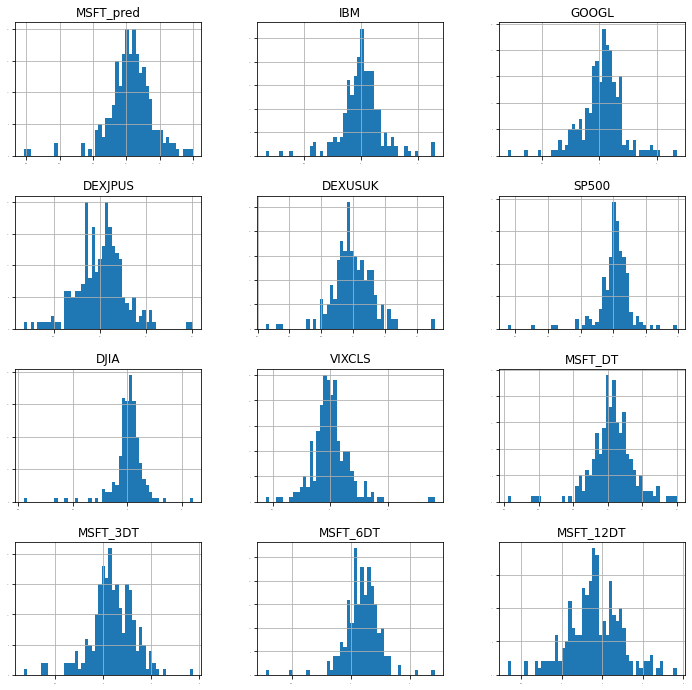

In [46]:
# Histogram to show distribution for each series individually 
# A `histogram` is a representation of the distribution of data.
# This function calls :meth:`matplotlib.pyplot.hist`, on each series in
# the DataFrame, resulting in one histogram per column.
dataset.hist(bins=50, sharex=False, sharey=False, xlabelsize=1, ylabelsize=1, figsize=(12,12))
pyplot.show()

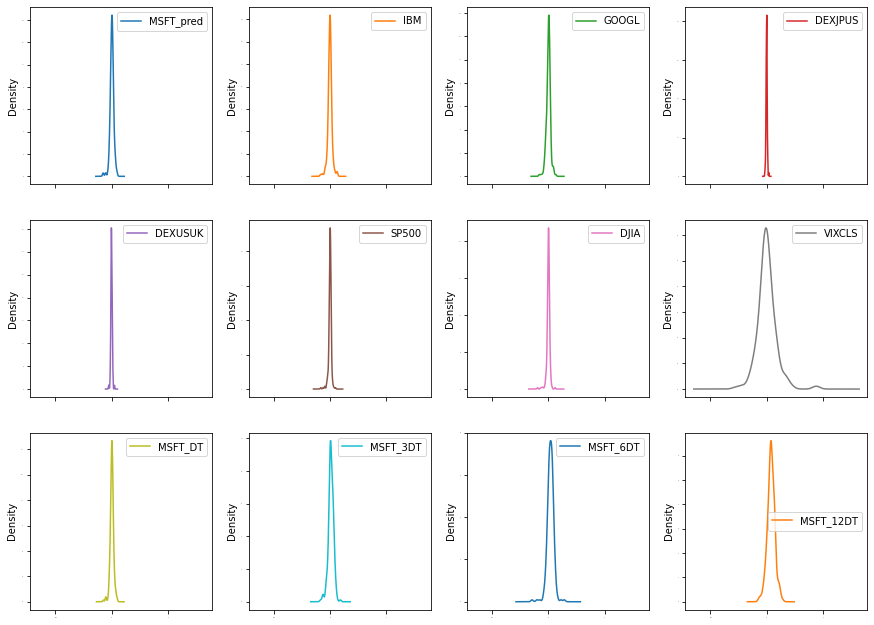

In [47]:
# Density distrubution over x axis scale
# The bix has a much larger variance compared to others
dataset.plot(kind='density', subplots=True, layout=(4,4), sharex=True, legend=True, fontsize=1, figsize=(15,15))
pyplot.show()

<AxesSubplot:title={'center':'Correlation Matrix'}>

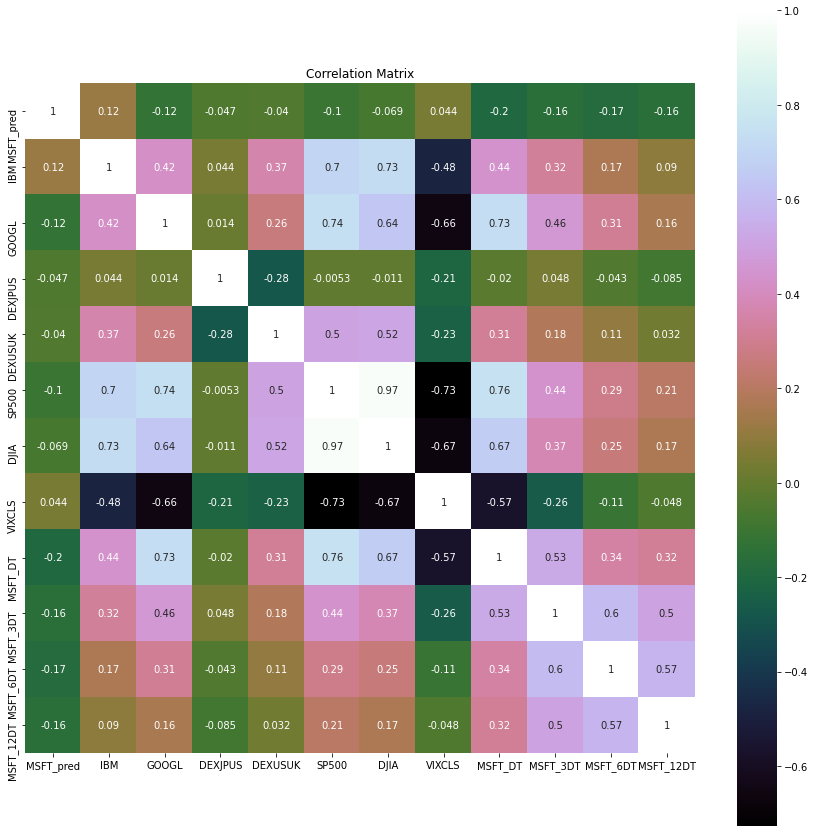

In [48]:
# Get a sense of interdependence of data via scatter plot and correlation matrix
# There is some correlation of the predicted variable with the lagged 5 days, 15, 30 and 60 return of msft 
correlation = dataset.corr()
pyplot.figure(figsize=(15,15))
pyplot.title('Correlation Matrix')
sns.heatmap(correlation, vmax=1, square=True,annot=True,cmap='cubehelix')

<Figure size 1080x1080 with 0 Axes>

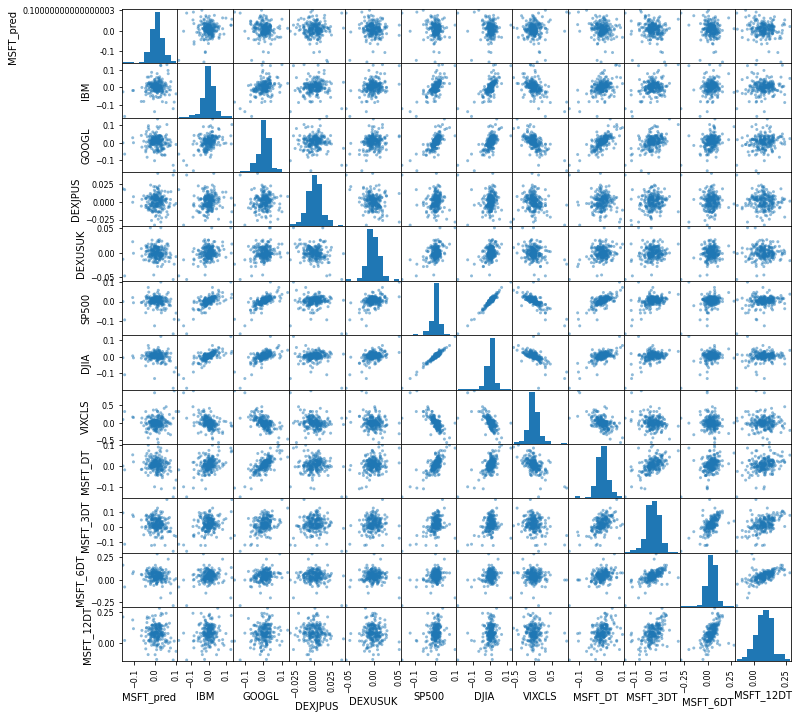

In [49]:
# There is some linear relationship of the predicted variable and lagged 15/30/60 day return of msft
pyplot.figure(figsize=(15,15))
scatter_matrix(dataset,figsize=(12,12))
pyplot.show()

# Time series analysis

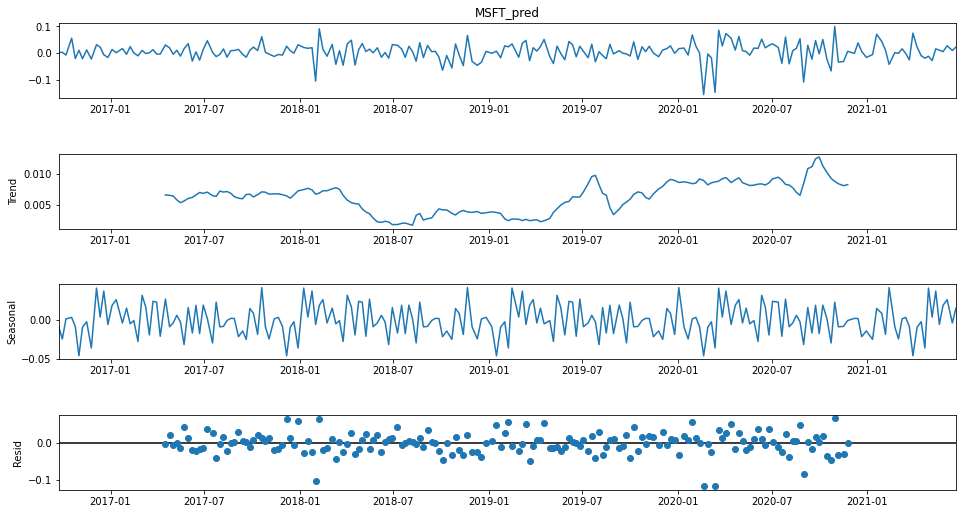

In [50]:
# Look at seasonal decomposition of our time series
# MSFT has general trend up. This should show up in constant/bias terms in models 
res = sm.tsa.seasonal_decompose(Y,freq=52)
fig = res.plot()
fig.set_figheight(8)
fig.set_figwidth(15)
pyplot.show()

# Data Prep

## Feature selection

In [53]:
# Sklearns selectKBest function to get sense of feature importance
bestfeatures = SelectKBest(k=5, score_func=f_regression)
fit = bestfeatures.fit(X,Y)
dfscores = pd.DataFrame(fit.scores_)
dfscores

,0
0,3.212
1,3.428
2,0.502
3,0.349
4,2.230
5,1.065
6,0.439
7,9.121
8,5.612
9,6.973


In [55]:
dfcolumns = pd.DataFrame(X.columns)
dfcolumns

,0
0,IBM
1,GOOGL
2,DEXJPUS
3,DEXUSUK
4,SP500
5,DJIA
6,VIXCLS
7,MSFT_DT
8,MSFT_3DT
9,MSFT_6DT


In [56]:
# concat two dataframes for better visualization 
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores

,0,0
0,IBM,3.212
1,GOOGL,3.428
2,DEXJPUS,0.502
3,DEXUSUK,0.349
4,SP500,2.230
5,DJIA,1.065
6,VIXCLS,0.439
7,MSFT_DT,9.121
8,MSFT_3DT,5.612
9,MSFT_6DT,6.973


In [58]:
#naming the dataframe columns
featureScores.columns = ['Specs','Score']
featureScores

,Specs,Score
0,IBM,3.212
1,GOOGL,3.428
2,DEXJPUS,0.502
3,DEXUSUK,0.349
4,SP500,2.230
5,DJIA,1.065
6,VIXCLS,0.439
7,MSFT_DT,9.121
8,MSFT_3DT,5.612
9,MSFT_6DT,6.973


In [59]:
# print 10 best features
featureScores.nlargest(10,'Score').set_index('Specs')

,Score
Specs,
MSFT_DT,9.121
MSFT_6DT,6.973
MSFT_12DT,5.646
MSFT_3DT,5.612
GOOGL,3.428
IBM,3.212
SP500,2.230
DJIA,1.065
DEXJPUS,0.502


# Eval Algos and models

In [60]:
# Split into continous series for time series models

validation_size = 0.2

train_size = int(len(X) * (1-validation_size))
X_train, X_test = X[0:train_size], X[train_size:len(X)]
Y_train, Y_test = Y[0:train_size], Y[train_size:len(X)]

In [61]:
# Test options and eval metrics
num_folds = 10
seed = 7
# scikit is moving away from mean_squared_error. 
# In order to avoid confusion, and to allow comparison with other models, we invert the final scores
scoring = 'neg_mean_squared_error' 

# Compare models 

In [62]:
# Regression and tree regression algos
models = []
models.append(('LR', LinearRegression()))
models.append(('LASSO', Lasso()))
models.append(('EN', ElasticNet()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVR', SVR()))

In [63]:
# NN 
models.append(('MLP', MLPRegressor()))

In [64]:
# Ensable Models
# Boosting methods
models.append(('ABR', AdaBoostRegressor()))
models.append(('GBR', GradientBoostingRegressor()))
# Bagging methods
models.append(('RFR', RandomForestRegressor()))
models.append(('ETR', ExtraTreesRegressor()))

In [66]:
# Once we have selected all the models, we loop over each of them. 
# First we run the K-fold analysis. 
# Next we run the model on the entire training and testing dataset.
names = []
kfold_results = []
test_results = []
train_results = []
for name, model in models:
    names.append(name)
    
    ## K Fold analysis:
    
    kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True)
    #converted mean square error to positive. The lower the beter
    cv_results = -1* cross_val_score(model, X_train, Y_train, cv=kfold, scoring=scoring)
    kfold_results.append(cv_results)
    

    # Full Training period
    res = model.fit(X_train, Y_train)
    train_result = mean_squared_error(res.predict(X_train), Y_train)
    train_results.append(train_result)
    
    # Test results
    test_result = mean_squared_error(res.predict(X_test), Y_test)
    test_results.append(test_result)
    
    msg = "%s: %f (%f) %f %f" % (name, cv_results.mean(), cv_results.std(), train_result, test_result)
    print(msg)

LR: 0.001116 (0.000544) 0.000873 0.001365
LASSO: 0.001013 (0.000570) 0.001002 0.001420
EN: 0.001013 (0.000570) 0.001002 0.001420
KNN: 0.001134 (0.000667) 0.000767 0.001481
CART: 0.002232 (0.001370) 0.000000 0.002124
SVR: 0.002693 (0.000824) 0.002592 0.003023
MLP: 0.002267 (0.001162) 0.002647 0.004149
ABR: 0.001146 (0.000593) 0.000463 0.001340
GBR: 0.001370 (0.000743) 0.000071 0.001282
RFR: 0.001275 (0.000792) 0.000194 0.001434
ETR: 0.001225 (0.000826) 0.000000 0.001425


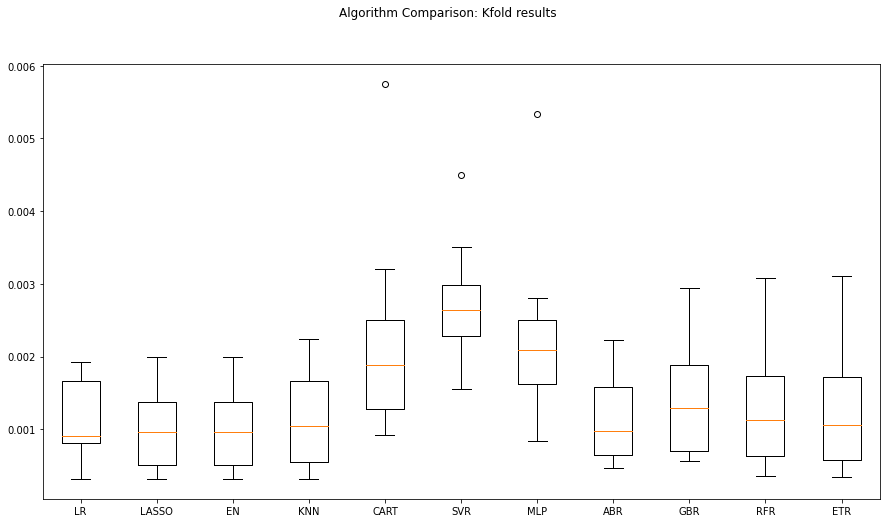

In [68]:
# Look at kfold results
# Linear regression and regularized regression including lasso and en seem to do good
fig = pyplot.figure()
fig.suptitle('Algorithm Comparison: Kfold results')
ax = fig.add_subplot(111)
pyplot.boxplot(kfold_results)
ax.set_xticklabels(names)
fig.set_size_inches(15,8)
pyplot.show()

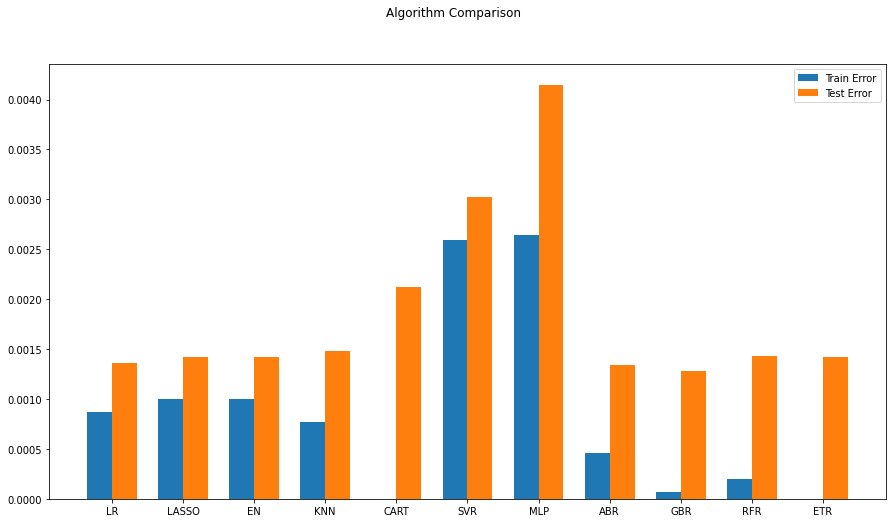

In [69]:
# Training and test error 
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Algorithm Comparison')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.show()

Looking at the training and test error, we still see a better performance of the linear models. Some of the algorithms, such as the decision tree regressor (CART) overfit on
the training data and produced very high error on the test set and these models
should be avoided. Ensemble models, such as gradient boosting regression (GBR) and
random forest regression (RFR) have low bias but high variance. We also see that the
artificial neural network (shown as MLP is the chart) algorithm shows higher errors
both in training set and test set, which is perhaps due to the linear relationship of the
variables not captured accurately by ANN or improper hyperparameters or insuffi‐
cient training of the model.

In [70]:
# Time series model - arima model
X_train_ARIMA=X_train.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
X_test_ARIMA=X_test.loc[:, ['GOOGL', 'IBM', 'DEXJPUS', 'SP500', 'DJIA', 'VIXCLS']]
tr_len = len(X_train_ARIMA)
te_len = len(X_test_ARIMA)
to_len = len (X)

In [71]:
modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[1,0,0])
model_fit = modelARIMA.fit()

In [72]:
error_Training_ARIMA = mean_squared_error(Y_train, model_fit.fittedvalues)
predicted = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
error_Test_ARIMA = mean_squared_error(Y_test,predicted)
error_Test_ARIMA

0.0014656780485543233

In [73]:
# LSTM
seq_len = 2 #Length of the seq for the LSTM

Y_train_LSTM, Y_test_LSTM = np.array(Y_train)[seq_len-1:], np.array(Y_test)
X_train_LSTM = np.zeros((X_train.shape[0]+1-seq_len, seq_len, X_train.shape[1]))
X_test_LSTM = np.zeros((X_test.shape[0], seq_len, X.shape[1]))
for i in range(seq_len):
    X_train_LSTM[:, i, :] = np.array(X_train)[i:X_train.shape[0]+i+1-seq_len, :]
    X_test_LSTM[:, i, :] = np.array(X)[X_train.shape[0]+i-1:X.shape[0]+i+1-seq_len, :]

In [74]:
# Lstm Network
def create_LSTMmodel(neurons=12, learn_rate = 0.01, momentum=0):
        # create model
    model = Sequential()
    model.add(LSTM(50, input_shape=(X_train_LSTM.shape[1], X_train_LSTM.shape[2])))
    #More number of cells can be added if needed 
    model.add(Dense(1))
    optimizer = SGD(lr=learn_rate, momentum=momentum)
    model.compile(loss='mse', optimizer='adam')
    return model
LSTMModel = create_LSTMmodel(12, learn_rate = 0.01, momentum=0)
LSTMModel_fit = LSTMModel.fit(X_train_LSTM, Y_train_LSTM, validation_data=(X_test_LSTM, Y_test_LSTM),epochs=330, batch_size=72, verbose=0, shuffle=False)

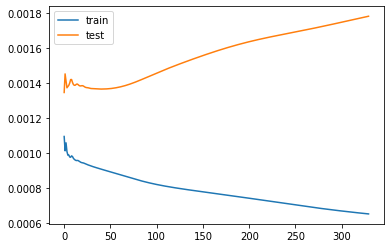

In [75]:
#Visual plot to check if the error is reducing
pyplot.plot(LSTMModel_fit.history['loss'], label='train')
pyplot.plot(LSTMModel_fit.history['val_loss'], label='test')
pyplot.legend()
pyplot.show()

In [76]:
error_Training_LSTM = mean_squared_error(Y_train_LSTM, LSTMModel.predict(X_train_LSTM))
predicted = LSTMModel.predict(X_test_LSTM)
error_Test_LSTM = mean_squared_error(Y_test,predicted)

In [77]:
# Append to prev results
test_results.append(error_Test_ARIMA)
test_results.append(error_Test_LSTM)

train_results.append(error_Training_ARIMA)
train_results.append(error_Training_LSTM)

names.append("ARIMA")
names.append("LSTM")

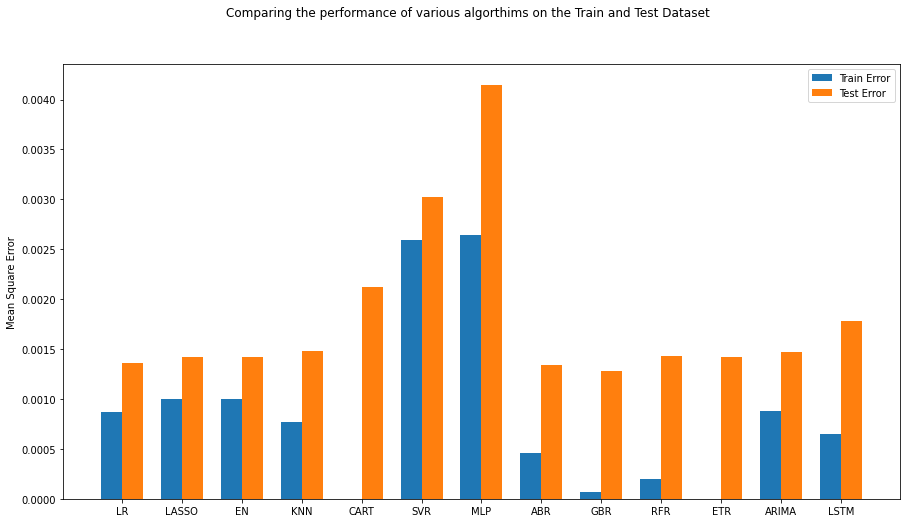

In [78]:
# Compare all
# compare algorithms
fig = pyplot.figure()

ind = np.arange(len(names))  # the x locations for the groups
width = 0.35  # the width of the bars

fig.suptitle('Comparing the performance of various algorthims on the Train and Test Dataset')
ax = fig.add_subplot(111)
pyplot.bar(ind - width/2, train_results,  width=width, label='Train Error')
pyplot.bar(ind + width/2, test_results, width=width, label='Test Error')
fig.set_size_inches(15,8)
pyplot.legend()
ax.set_xticks(ind)
ax.set_xticklabels(names)
pyplot.ylabel('Mean Square Error')
pyplot.show()

Looking at the chart above, we find time series based ARIMA model comparable to
the linear supervised-regression models such as Linear Regression (LR), Lasso Regres‐
sion (LASSO) and Elastic Net (EN). This can primarily be due to the stronmg linear
relationship as discussed before. The LSTM model performs decently, however,
ARIMA model outperforms the LSTM model in the test set. Hence, we select the
ARIMA model for the model tuning.

# Model tuning and grid search

As shown in the chart above the ARIMA model is one of the best mode, so we perform the model tuning of the ARIMA model. The default order of ARIMA model is [1,0,0]. We perform a grid search with different combination p,d and q in the ARIMA model's order.  

In [81]:
#Grid Search for ARIMA Model
#Change p,d and q and check for the best result

# evaluate an ARIMA model for a given order (p,d,q)
#Assuming that the train and Test Data is already defined before
def evaluate_arima_model(arima_order):
    #predicted = list()     
    modelARIMA=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=arima_order)
    model_fit = modelARIMA.fit()
    error = mean_squared_error(Y_train, model_fit.fittedvalues)
    return error
 
# evaluate combinations of p, d and q values for an ARIMA model
def evaluate_models(p_values, d_values, q_values): 
    best_score, best_cfg = float("inf"), None
    for p in p_values:
        for d in d_values:
            for q in q_values:
                order = (p,d,q)                
                try:
                    mse = evaluate_arima_model(order)                    
                    if mse < best_score:
                        best_score, best_cfg = mse, order
                    print('ARIMA%s MSE=%.7f' % (order,mse))
                except:
                    continue
    print('Best ARIMA%s MSE=%.7f' % (best_cfg, best_score))
    
# evaluate parameters
p_values = [0, 1, 2]
d_values = range(0, 2)
q_values = range(0, 2)
warnings.filterwarnings("ignore")
evaluate_models(p_values, d_values, q_values)   

ARIMA(0, 0, 0) MSE=0.0009067
ARIMA(0, 0, 1) MSE=0.0008892
ARIMA(1, 0, 0) MSE=0.0008840
ARIMA(1, 0, 1) MSE=0.0008837
ARIMA(2, 0, 0) MSE=0.0008833
ARIMA(2, 0, 1) MSE=0.0008815
Best ARIMA(2, 0, 1) MSE=0.0008815


# Finalize and run on test dataset

In [82]:
# prepare model
modelARIMA_tuned=ARIMA(endog=Y_train,exog=X_train_ARIMA,order=[2,0,1])
model_fit_tuned = modelARIMA_tuned.fit()

In [83]:
# estimate accuracy on validation set
predicted_tuned = model_fit.predict(start = tr_len -1 ,end = to_len -1, exog = X_test_ARIMA)[1:]
print(mean_squared_error(Y_test,predicted_tuned))

0.0014656780485543233


After tuning the model and picking the best ARIMA model or the order 2,0 and 1 we select this model and can it can be used for the modeling purpose. 

In [84]:
# Save off the model
# Save Model Using Pickle
from pickle import dump
from pickle import load

# save the model to disk
filename = 'finalized_model.sav'
dump(model_fit_tuned, open(filename, 'wb'))

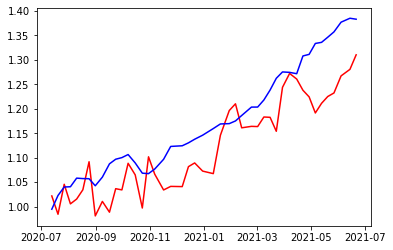

In [85]:
# Comapre actual vs predicted
predicted_tuned.index = Y_test.index
pyplot.plot(np.exp(Y_test).cumprod(), 'r') # plotting t, a separately
pyplot.plot(np.exp(predicted_tuned).cumprod(), 'b')
pyplot.rcParams["figure.figsize"] = (8,5)
pyplot.show()

We can conclude that simple models - linear regression, regularized regression (i.e.
Lasso and elastic net) - along with the time series model such as ARIMA are promis‐
ing modelling approaches for asset price prediction problem. These models can
enable financial practitioners to model time dependencies with a very flexible
approach. The overall approach presented in this case study may help us encounter
overfitting and underfitting which are some of the key challenges in the prediction
problem in finance.
We should also note that we can use better set of indicators, such as P/E ratio, trading
volume, technical indicators or news data, which might lead to better results. We will
demonstrate this in some of the case studies in the book.
Overall, we created a supervised-regression and time series modelling framework
which allows us to perform asset class prediction using historical data to generate
results and analyze risk and profitability before risking any actual capital.